In [25]:
# Importing Libraries
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# Importing Dataset
data = pd.read_csv("Social_Network_Ads.csv")

In [27]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [28]:
data.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [29]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


In [31]:
data.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [32]:
X = data.iloc[:, [2,3]].values

In [34]:
y = data.iloc[:, [4]].values

In [35]:
# Splitting the dataset into Train and Test

from  sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [36]:
# Features Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scale = sc.fit_transform(X_train)
X_test_scale = sc.transform(X_test)

In [37]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier

In [38]:
rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

In [39]:
rf.fit(X_train_scale, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [40]:
# Predicting the Test set results
y_pred = rf.predict(X_test_scale)

In [41]:
y_pred

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [42]:
# Evaluating the results using the Classification Matrics
from sklearn.metrics import accuracy_score, auc , confusion_matrix, classification_report, roc_auc_score, roc_curve

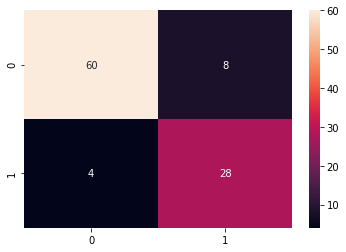

In [43]:
# Confusion Metix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot= True, fmt="d")

In [44]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91        68
           1       0.78      0.88      0.82        32

   micro avg       0.88      0.88      0.88       100
   macro avg       0.86      0.88      0.87       100
weighted avg       0.89      0.88      0.88       100



In [45]:
# Accuray Score
print(accuracy_score(y_test, y_pred))

0.88


In [46]:
# roc_auc_score
print(roc_auc_score(y_test, y_pred))

0.8786764705882353


AUC: 0.500


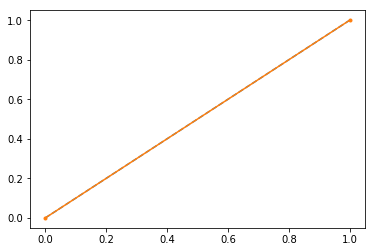

In [47]:
# predict probabilities
probs = rf.predict_proba(X_test)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)

# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

# show the plot
plt.show()

In [58]:
# predict probabilities
y_probas = rf.predict_proba(X_test_scale)

y_probas

array([[0.4, 0.6],
       [1. , 0. ],
       [0.2, 0.8],
       [0.3, 0.7],
       [0.2, 0.8],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.9, 0.1],
       [0.2, 0.8],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.2, 0.8],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0.1, 0.9],
       [0.6, 0.4],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0.2, 0.8],
       [0.5, 0.5],
       [1. , 0. ],
       [1. , 0. ],
       [0.1, 0.9],
       [1. , 0. ],
       [0.1, 0.9],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.2, 0.8],
       [1. , 0. ],
       [0.6, 0.4],
       [1. , 0. ],
       [0.9, 0.1],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.2, 0.8],
       [1. ,

In [56]:
# keep probabilities for the positive outcome only
#y_probas = y_probas[:, 1]

In [59]:
#y_test = # true labels
#y_probas = # predicted results
fpr, tpr, thresholds = roc_curve(y_test, y_probas, pos_label=0)

# Print ROC curve
plt.plot(fpr,tpr)
plt.show() 

# Print AUC
auc = np.trapz(tpr,fpr)
print('AUC:', auc)

ValueError: bad input shape (100, 2)